In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

In [37]:
dataset = pd.read_csv('personality_synthetic_dataset.csv')

In [38]:
dataset.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [41]:
dataset.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [42]:
dataset.isnull().sum()

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64

In [43]:
features_to_plot = ['social_energy', 'alone_time_preference', 'talkativeness', 'deep_reflection']

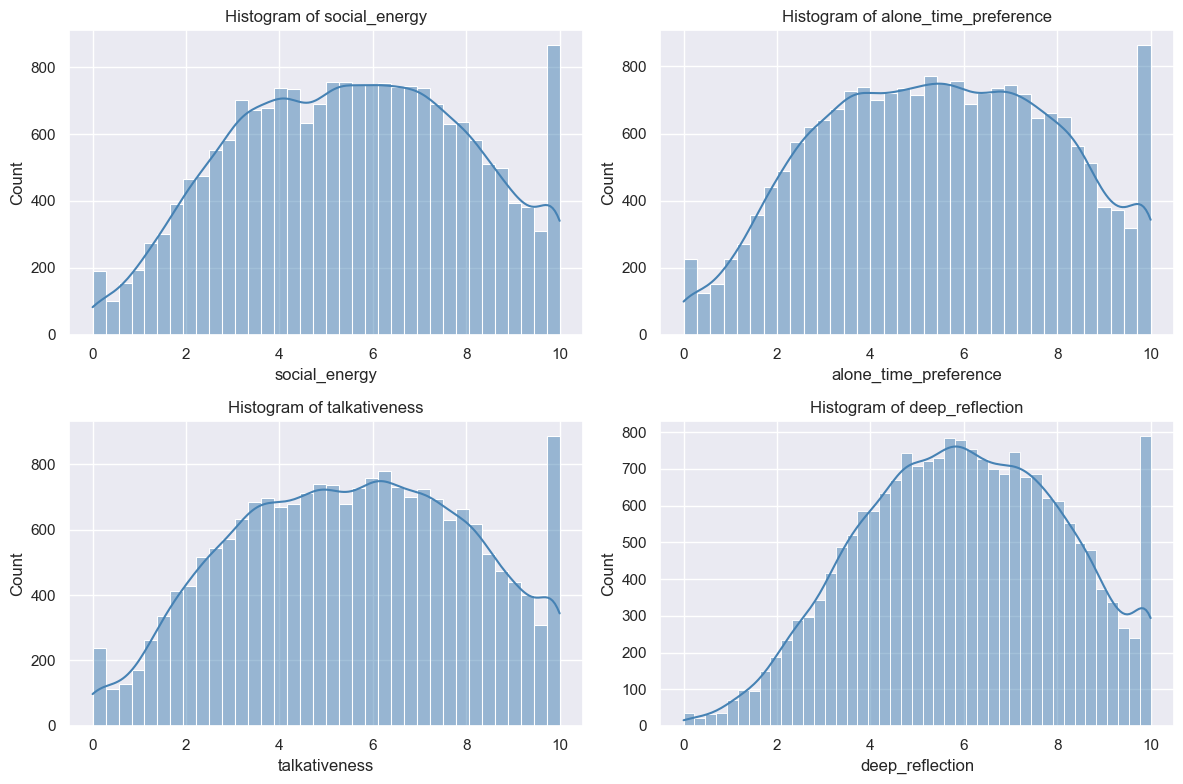

In [44]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset[feature], kde=True, color='steelblue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

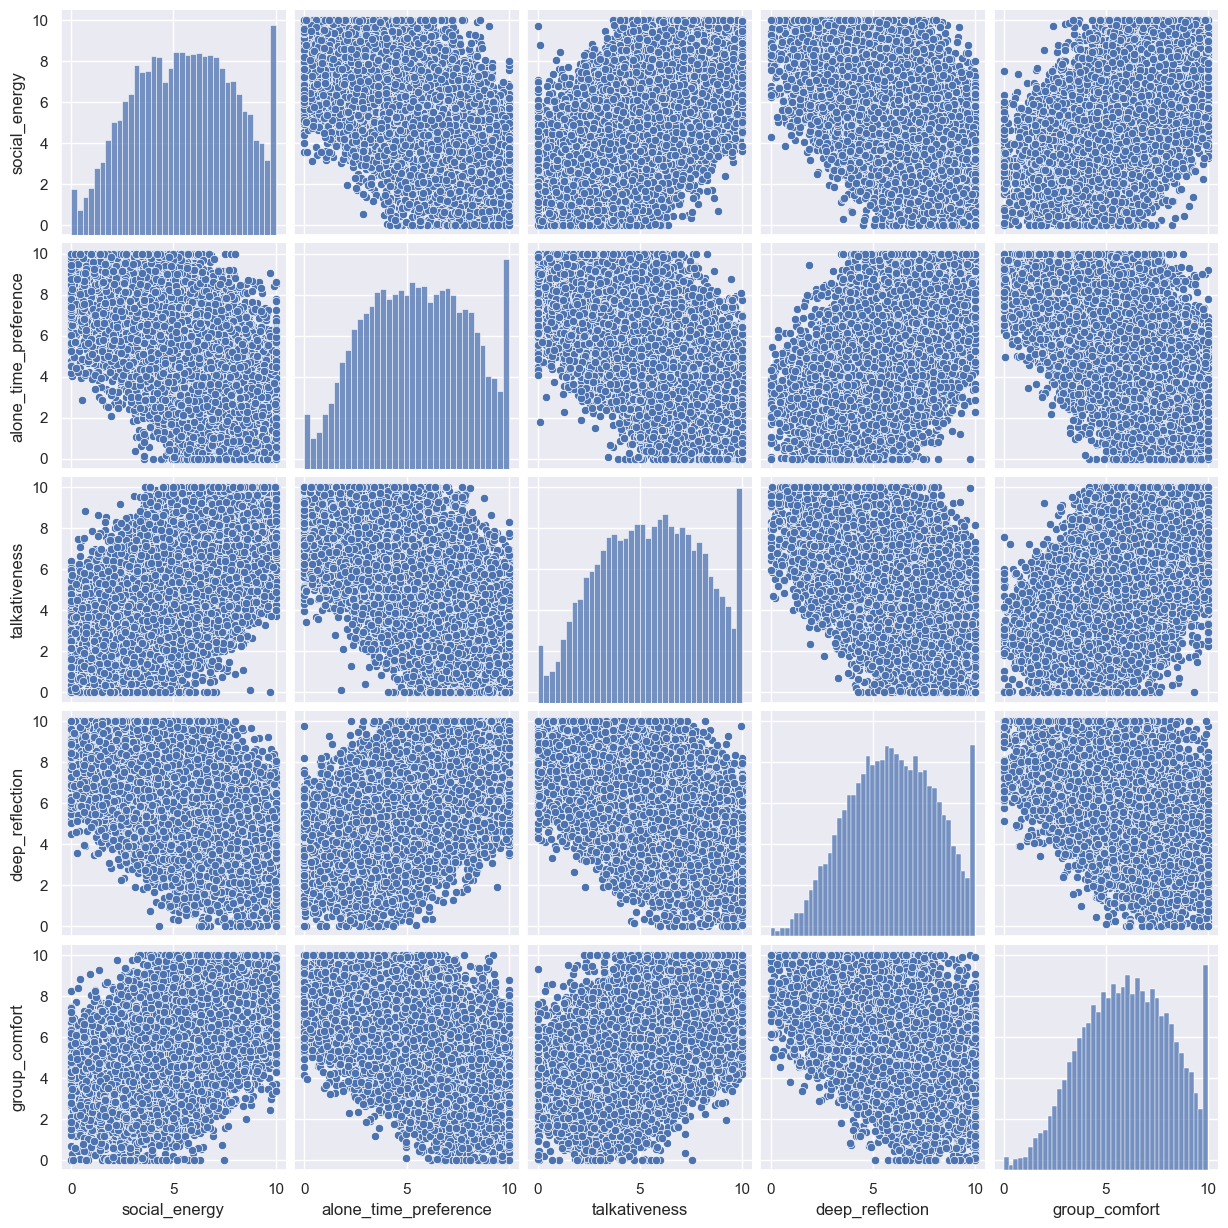

In [45]:
subset_features = ['social_energy', 'alone_time_preference', 'talkativeness', 'deep_reflection', 'group_comfort']
sns.pairplot(dataset[subset_features])
plt.show()

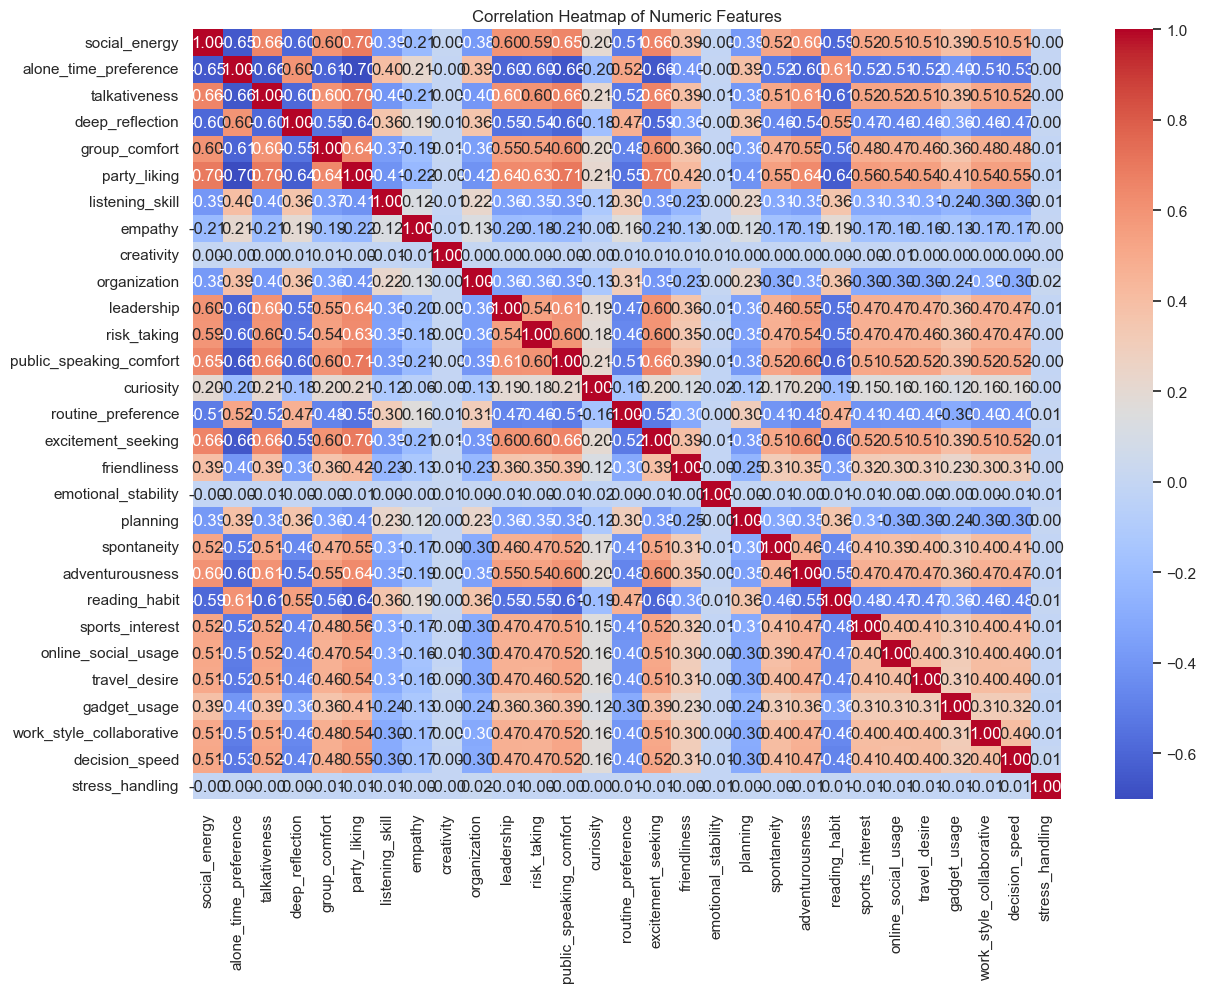

In [46]:
# Generate a correlation heatmap if there are 4 or more numeric columns
numeric_df = dataset.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(14, 10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

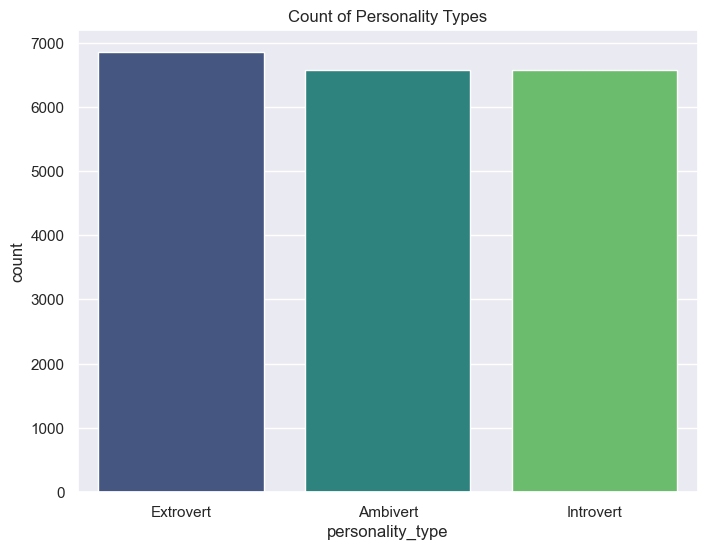

In [47]:
# Plot a count plot for the target variable personality_type
plt.figure(figsize=(8, 6))
sns.countplot(x='personality_type', data=dataset, palette='viridis')
plt.title('Count of Personality Types')
plt.show()

In [48]:
X = dataset.drop('personality_type', axis=1)
y = dataset['personality_type']

In [49]:
X

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,0.000000,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,4.530322,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,7.092078,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,5.232694,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,6.378051,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.783857,4.345803,8.220063,6.297798,5.162622,5.702266,5.518356,3.420139,5.811565,4.830760,...,8.521256,4.355973,6.454815,2.557365,6.949292,4.176390,5.649897,5.665498,5.252077,4.297520
19996,2.621406,8.152097,2.954341,8.791467,2.670252,2.931244,5.855202,5.044124,6.244061,4.048378,...,4.818308,2.631298,10.000000,3.697801,3.217559,3.638815,5.177155,5.106628,0.982214,5.873321
19997,0.039689,8.277160,5.728101,7.790080,3.427897,0.708457,7.099321,5.784592,5.400400,5.765557,...,3.318511,4.071008,9.974147,2.954407,5.427296,6.270830,3.793430,5.009167,3.810962,5.678412
19998,7.756725,3.956191,8.906972,3.793775,7.608467,6.292705,6.824980,5.653421,7.347820,5.680186,...,7.156525,8.148780,3.840900,6.093418,7.814507,8.428745,8.736932,8.060841,8.161087,5.941793


In [50]:
y

0        Extrovert
1         Ambivert
2         Ambivert
3        Extrovert
4        Introvert
           ...    
19995     Ambivert
19996    Introvert
19997    Introvert
19998    Extrovert
19999    Introvert
Name: personality_type, Length: 20000, dtype: object

In [51]:
scaler = StandardScaler()

In [52]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [53]:
X_scaled

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,0.520609,-0.641633,1.285998,-1.592481,0.497126,1.262661,-0.115086,-0.034588,0.098186,-3.518772,...,-0.333878,1.463003,-0.308742,2.333467,1.405556,-0.358438,1.891806,0.958655,1.294207,0.801806
1,0.352364,0.110868,0.604344,0.608500,-0.873622,-0.633987,-0.857781,-1.645114,0.102522,-0.850025,...,0.297447,0.569889,-0.086431,-0.081891,-0.960490,-0.405412,-0.030147,-0.323520,-1.212411,-1.716717
2,0.790058,0.347911,-0.644583,-0.618038,-0.308059,0.858244,1.528937,-0.231658,0.692211,0.659068,...,0.015064,1.908541,-0.318024,-1.210837,-0.792950,0.326201,0.015536,-0.367504,-0.486144,-0.224455
3,0.263499,-0.945135,0.198211,-1.846697,0.836705,1.764793,1.500260,1.606950,1.956270,-0.436268,...,-0.607596,1.568598,-0.289367,1.494785,0.583966,0.445707,-0.354473,0.089851,0.557587,-0.075082
4,0.024012,0.614369,-0.648212,1.834777,-2.003169,-1.664393,0.307018,0.178267,2.346426,0.238445,...,-0.159974,-0.847142,0.515664,-1.635417,0.673740,0.013147,-0.179566,-0.354027,0.152726,-1.492259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.698950,-0.444681,1.082865,0.156823,-0.390985,0.235618,-0.877536,-1.995658,-0.123244,-0.673042,...,1.573765,-0.307605,0.236781,-1.519468,0.238545,-0.689712,-0.212058,-0.442648,-0.135835,-1.130292
19996,-1.169870,1.081702,-1.033630,1.310033,-1.535063,-0.750338,-0.673127,-0.937599,0.165732,-1.133931,...,-0.352084,-1.090378,1.869852,-0.929082,-1.736496,-0.967955,-0.492871,-0.738388,-2.332031,-0.072912
19997,-2.215750,1.131855,0.081250,0.846936,-1.187279,-1.541227,0.081844,-0.455170,-0.397966,-0.122366,...,-1.132106,-0.436942,1.857943,-1.313925,-0.566980,0.394349,-1.314813,-0.789962,-0.877070,-0.203699
19998,0.910499,-0.600921,1.358960,-1.001175,0.731737,0.445702,-0.084635,-0.540630,0.903217,-0.172657,...,0.863989,1.413824,-0.967305,0.311091,0.696465,1.511263,1.621663,0.824907,1.360410,-0.026968


In [54]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [55]:
y_encoded

array([1, 0, 0, ..., 2, 1, 2])

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [57]:
X_train

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
10373,0.909380,-1.431149,1.798290,-0.133791,1.829527,1.083494,-0.240702,-0.213765,-0.584121,-1.385455,...,0.210804,0.009545,-1.544086,-0.607020,1.587027,1.858484,1.224678,0.530328,0.317388,1.747606
15334,0.796265,-1.651200,1.334660,-2.172859,1.137863,1.069097,-0.526603,-0.916095,1.390639,-0.741453,...,1.673526,0.701432,-0.946997,0.602581,0.686089,2.223417,-0.949099,-0.487174,0.722305,-1.511350
13424,0.081367,0.568920,0.355945,-0.046904,0.432809,0.507215,-1.075914,1.661465,-1.307014,0.811537,...,0.853338,0.417897,0.104747,-0.561677,-0.341608,-0.002206,-0.020329,0.639627,-1.270242,0.311590
2757,-0.792961,0.732533,-0.727053,1.115253,1.114586,-0.805913,0.025363,-0.581725,-0.747192,1.526429,...,-0.643715,0.686124,-0.449959,0.304875,-1.353246,0.740692,-0.085970,0.042261,-0.324603,-0.797224
6051,0.025562,0.158656,0.456016,-0.320541,-0.360140,0.277981,0.495032,-1.673661,-0.252836,-1.948563,...,-0.821786,-1.151946,0.770787,0.716643,-0.864150,-0.837840,-1.603946,-0.375851,0.299831,-0.928508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19263,-0.786028,1.625873,-1.046145,1.687020,-0.980912,0.116729,0.103691,-1.124330,0.142589,-0.180611,...,1.244276,0.270913,0.129643,-1.485908,-0.929726,-1.737502,-0.295580,-1.462401,-0.238097,0.455794
16082,-0.526793,1.199074,-1.808265,1.868924,-1.536835,-1.151255,1.805271,0.849803,0.774965,0.250956,...,-1.714377,-0.381164,1.579676,-0.220035,-1.760324,-1.625067,-1.561825,0.687464,-0.148233,-1.963398
17264,0.237731,-0.163949,-0.686997,-0.034276,-1.594471,-0.803214,1.130385,0.720952,-0.532796,-0.222181,...,-0.488604,-0.153411,-0.210246,0.597083,-0.924783,-0.101574,0.126136,0.369709,0.663952,-0.057446
9093,-0.802024,1.009865,0.509521,-1.923857,-0.628403,-0.492492,0.675503,-0.115226,-0.634596,-0.011662,...,-1.079446,0.443752,-0.726205,0.400476,-1.146035,-1.988039,-0.621625,-1.282099,1.210108,0.757592


In [58]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [60]:
y_pred

array([1, 0, 2, ..., 2, 0, 2])

In [61]:
y_test

array([1, 0, 2, ..., 2, 0, 2])

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest classifier: {accuracy:.2f}')

Accuracy of the Random Forest classifier: 1.00


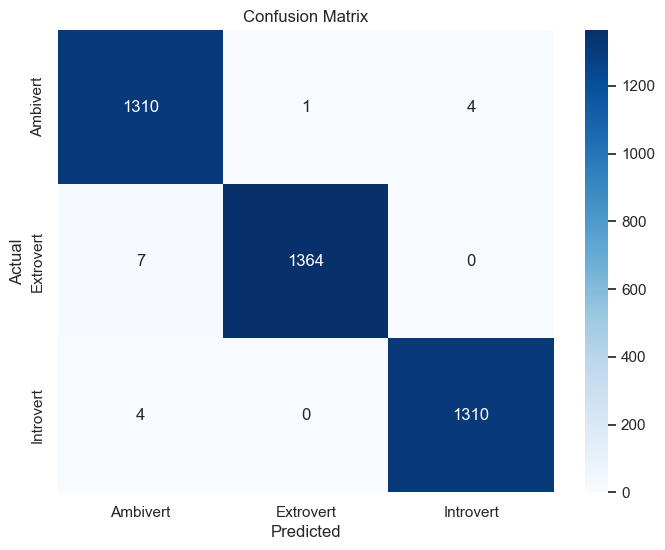

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Permutation Importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='teal')
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1315
           1       1.00      0.99      1.00      1371
           2       1.00      1.00      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### Saving the model

In [ ]:
import pickle
with open("random_forest_class_personality.pkl", 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
